In [30]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import DensityMatrix, partial_trace

In [35]:
q = QuantumRegister(3, 'data')
a = QuantumRegister(2, 'ancilla')
c = ClassicalRegister(2, 'syndrome')
value = ClassicalRegister(3, 'output')

qc = QuantumCircuit(q,a,c,value)

#initial_state = [0.6,0.8]
#qc.initialize(initial_state, q[0])
#qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
#encoding to |+++> and |--->
qc.h(q)
qc.z(2)
qc.barrier()
#ecncoding part
qc.h(q)
qc.cx(q[0],a[0])
qc.cx(q[1],a[0])
qc.cx(q[1],a[1])
qc.cx(q[2],a[1])
qc.h(q)
qc.barrier()
qc.measure(a,c)


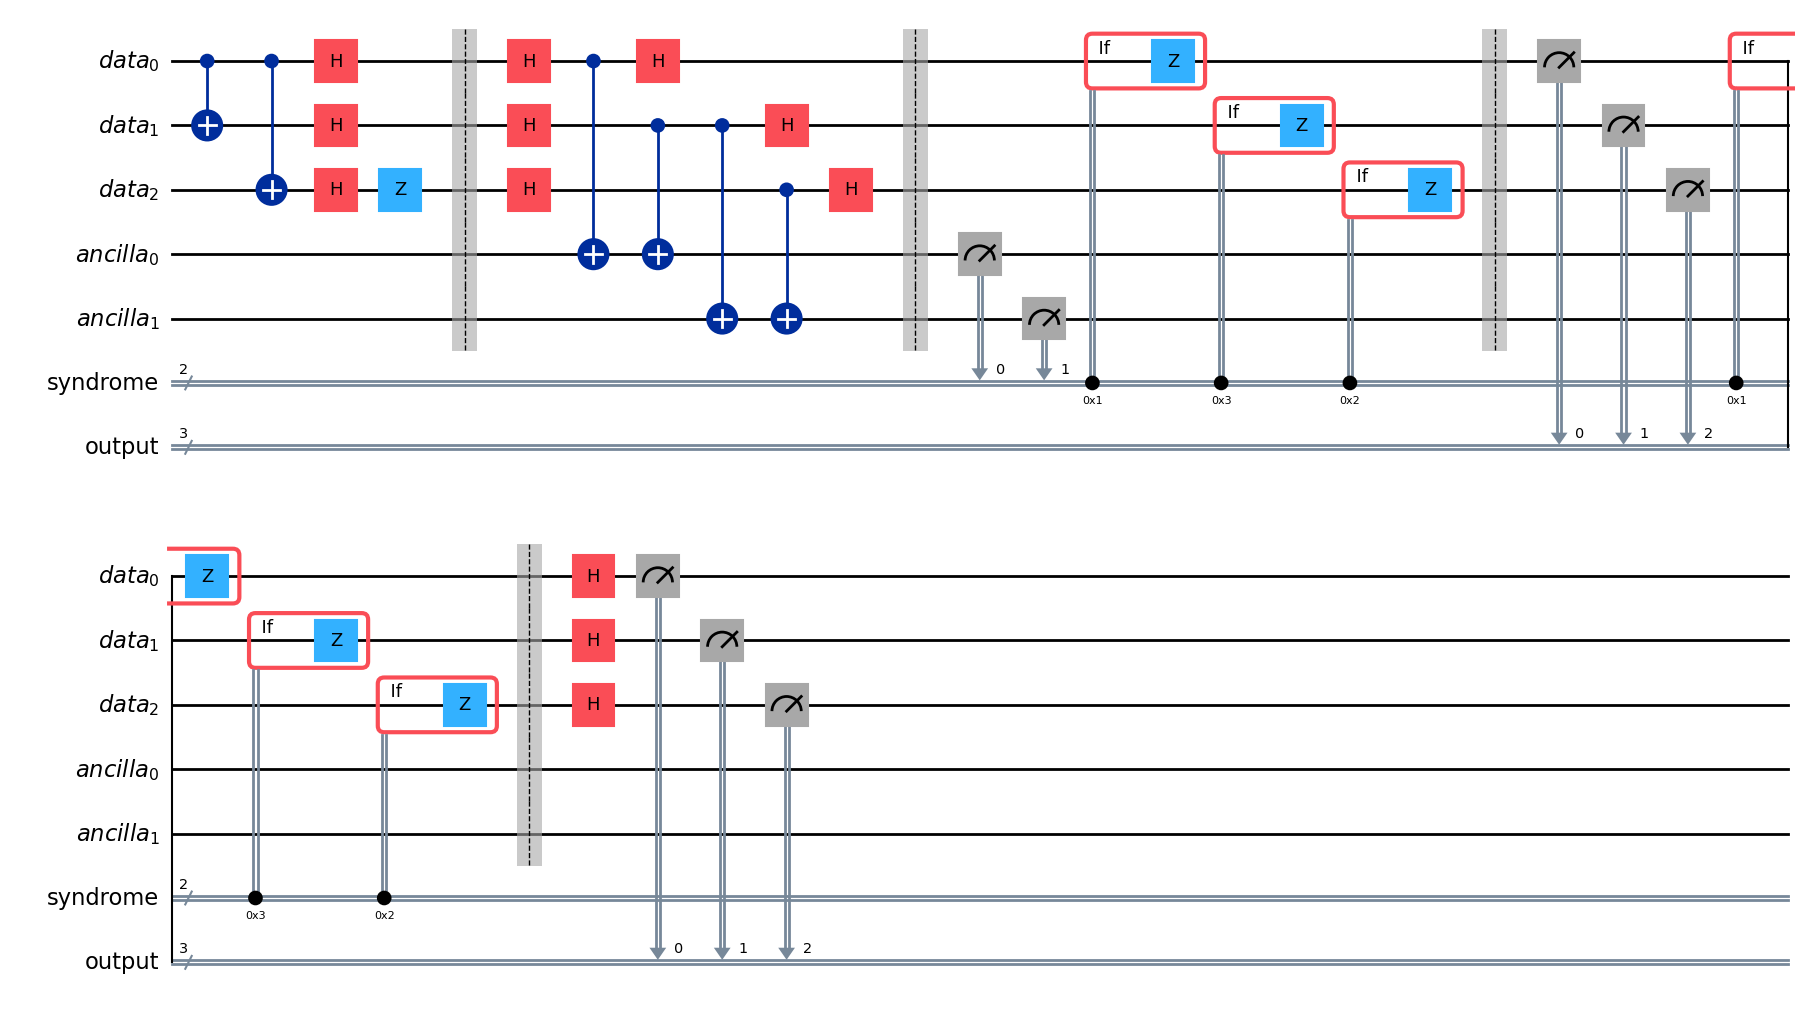

In [38]:
#correction
"""Syndrome 00 --> no error
            01 --> error on q[0]
            11 --> error on q[1]
            10 --> error on q[2]
"""
with qc.if_test((c, 0b01)):
    qc.z(q[0])
with qc.if_test((c, 0b11)):
    qc.z(q[1])
with qc.if_test((c, 0b10)):
    qc.z(q[2])
qc.barrier()
qc.h(q)
qc.measure(q,value)
qc.draw('mpl')

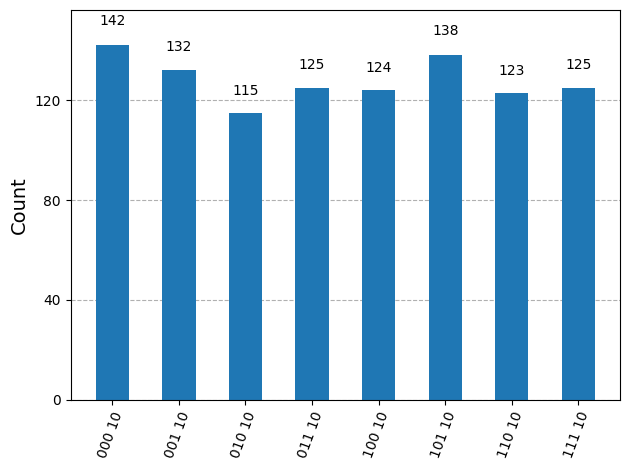

In [41]:
backend = AerSimulator()
job = backend.run(qc,shots=1024)
results = job.result()
counts = results.get_counts(qc)
plot_histogram(counts)